In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
df = pd.read_csv('data-export.csv')

In [76]:
df.head()

# ----------------------------------------  \
0  Session primary channel group (Default channel...   
1                                             Direct   
2                                     Organic Social   
3                                             Direct   
4                                     Organic Social   

                 Unnamed: 1 Unnamed: 2 Unnamed: 3        Unnamed: 4  \
0  Date + hour (YYYYMMDDHH)      Users   Sessions  Engaged sessions   
1                2024041623        237        300               144   
2                2024041719        208        267               132   
3                2024041723        188        233               115   
4                2024041718        187        256               125   

                            Unnamed: 5                 Unnamed: 6  \
0  Average engagement time per session  Engaged sessions per user   
1                   47.526666666666700         0.6075949367088610   
2                    32.09737827715360         0.6346153846153850   
3                    39.93991416309010         0.6117021276595740   
4                          32.16015625         0.6684491978609630   

           Unnamed: 7           Unnamed: 8   Unnamed: 9  
0  Events per session      Engagement rate  Event count  
1   4.673333333333330                 0.48         1402  
2   4.295880149812730   0.4943820224719100         1147  
3   4.587982832618030  0.49356223175965700         1069  
4            4.078125           0.48828125         1044

In [78]:
df.columns = df.iloc[0]
df = df.drop(index=0).reset_index(drop=True)
df.columns = ["channel group", "DateHour", "Users", "Sessions", "Engaged Session","Avg eng time per session","Engaged sessions per user","Events per session","Engagement per rate","Event count"]

In [82]:
df.head()

channel group    DateHour Users Sessions Engaged Session  \
0          Direct  2024041623   237      300             144   
1  Organic Social  2024041719   208      267             132   
2          Direct  2024041723   188      233             115   
3  Organic Social  2024041718   187      256             125   
4  Organic Social  2024041720   175      221             112   

  Avg eng time per session Engaged sessions per user Events per session  \
0       47.526666666666700        0.6075949367088610  4.673333333333330   
1        32.09737827715360        0.6346153846153850  4.295880149812730   
2        39.93991416309010        0.6117021276595740  4.587982832618030   
3              32.16015625        0.6684491978609630           4.078125   
4       46.918552036199100                      0.64  4.529411764705880   

   Engagement per rate Event count  
0                 0.48        1402  
1   0.4943820224719100        1147  
2  0.49356223175965700        1069  
3           0.48828125        1044  
4   0.5067873303167420        1001

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   channel group              3182 non-null   object        
 1   DateHour                   3182 non-null   datetime64[ns]
 2   Users                      3182 non-null   int64         
 3   Sessions                   3182 non-null   int64         
 4   Engaged Session            3182 non-null   int64         
 5   Avg eng time per session   3182 non-null   float64       
 6   Engaged sessions per user  3182 non-null   float64       
 7   Events per session         3182 non-null   float64       
 8   Engagement per rate        3182 non-null   float64       
 9   Event count                3182 non-null   int64         
 10  Hour                       3182 non-null   int32         
dtypes: datetime64[ns](1), float64(4), int32(1), int64(4), object(1)
memor

cleaning data and data validation for the
above data set

In [126]:
df["DateHour"] = pd.to_datetime(df["DateHour"], format="%Y%m%d%H", errors='coerce')

numeric_cols = df.columns.drop(["channel group", "DateHour"])
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')
df["Hour"] = df["DateHour"].dt.hour

df.head()

channel group            DateHour  Users  Sessions  Engaged Session  \
0          Direct 2024-04-16 23:00:00    237       300              144   
1  Organic Social 2024-04-17 19:00:00    208       267              132   
2          Direct 2024-04-17 23:00:00    188       233              115   
3  Organic Social 2024-04-17 18:00:00    187       256              125   
4  Organic Social 2024-04-17 20:00:00    175       221              112   

   Avg eng time per session  Engaged sessions per user  Events per session  \
0                 47.526667                   0.607595            4.673333   
1                 32.097378                   0.634615            4.295880   
2                 39.939914                   0.611702            4.587983   
3                 32.160156                   0.668449            4.078125   
4                 46.918552                   0.640000            4.529412   

   Engagement per rate  Event count  Hour  
0             0.480000         1402    23  
1             0.494382         1147    19  
2             0.493562         1069    23  
3             0.488281         1044    18  
4             0.506787         1001    20

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   channel group              3182 non-null   object        
 1   DateHour                   3182 non-null   datetime64[ns]
 2   Users                      3182 non-null   int64         
 3   Sessions                   3182 non-null   int64         
 4   Engaged Session            3182 non-null   int64         
 5   Avg eng time per session   3182 non-null   float64       
 6   Engaged sessions per user  3182 non-null   float64       
 7   Events per session         3182 non-null   float64       
 8   Engagement per rate        3182 non-null   float64       
 9   Event count                3182 non-null   int64         
 10  Hour                       3182 non-null   int32         
dtypes: datetime64[ns](1), float64(4), int32(1), int64(4), object(1)
memor

In [106]:
df.describe()

DateHour        Users     Sessions  \
count                           3182  3182.000000  3182.000000   
mean   2024-04-20 01:17:07.278441216    41.935889    51.192646   
min              2024-04-06 00:00:00     0.000000     1.000000   
25%              2024-04-13 02:15:00    20.000000    24.000000   
50%              2024-04-20 02:00:00    42.000000    51.000000   
75%              2024-04-26 22:00:00    60.000000    71.000000   
max              2024-05-03 23:00:00   237.000000   300.000000   
std                              NaN    29.582258    36.919962   

       Engaged Session  Avg eng time per session  Engaged sessions per user  \
count      3182.000000               3182.000000                3182.000000   
mean         28.325581                 66.644581                   0.606450   
min           0.000000                  0.000000                   0.000000   
25%          13.000000                 32.103034                   0.561404   
50%          27.000000                 49.020202                   0.666667   
75%          41.000000                 71.487069                   0.750000   
max         144.000000               4525.000000                   2.000000   
std          20.650569                127.200659                   0.264023   

       Events per session  Engagement per rate  Event count         Hour  
count         3182.000000          3182.000000  3182.000000  3182.000000  
mean             4.675969             0.503396   242.272470    11.807040  
min              1.000000             0.000000     1.000000     0.000000  
25%              3.750000             0.442902   103.000000     6.000000  
50%              4.410256             0.545455   226.000000    12.000000  
75%              5.217690             0.633333   339.000000    18.000000  
max             56.000000             1.000000  1402.000000    23.000000  
std              2.795228             0.228206   184.440313     6.886686

sessions and user over time

In [130]:
sns.set(style="whitegrid")

In [148]:
plt.figure(figsize=(10,4))
df.groupby("DateHour")[["Sessions","Users"]].sum().plot(ax=plt.gca())
plt.title("Sessions and users over time")
plt.xlabel("DateHour")
plt.ylabel("count")
plt.show()

total users by channel

In [154]:
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x="channel group", y="Users", estimator=np.sum, palette="viridis")
plt.title("👥 Total Users by Channel")
plt.xticks(rotation=45)
plt.show()

/var/folders/l7/t8x25d5d2gl5byc3kl97khjr0000gn/T/ipykernel_84398/3854721121.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="channel group", y="Users", estimator=np.sum, palette="viridis")
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128101 (\N{BUSTS IN SILHOUETTE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


Average engagement time by channel

In [158]:
df.head()

channel group            DateHour  Users  Sessions  Engaged Session  \
0          Direct 2024-04-16 23:00:00    237       300              144   
1  Organic Social 2024-04-17 19:00:00    208       267              132   
2          Direct 2024-04-17 23:00:00    188       233              115   
3  Organic Social 2024-04-17 18:00:00    187       256              125   
4  Organic Social 2024-04-17 20:00:00    175       221              112   

   Avg eng time per session  Engaged sessions per user  Events per session  \
0                 47.526667                   0.607595            4.673333   
1                 32.097378                   0.634615            4.295880   
2                 39.939914                   0.611702            4.587983   
3                 32.160156                   0.668449            4.078125   
4                 46.918552                   0.640000            4.529412   

   Engagement per rate  Event count  Hour  
0             0.480000         1402    23  
1             0.494382         1147    19  
2             0.493562         1069    23  
3             0.488281         1044    18  
4             0.506787         1001    20

/var/folders/l7/t8x25d5d2gl5byc3kl97khjr0000gn/T/ipykernel_84398/3620689721.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="channel group", y="Avg eng time per session",estimator=np.mean,palette="magma")


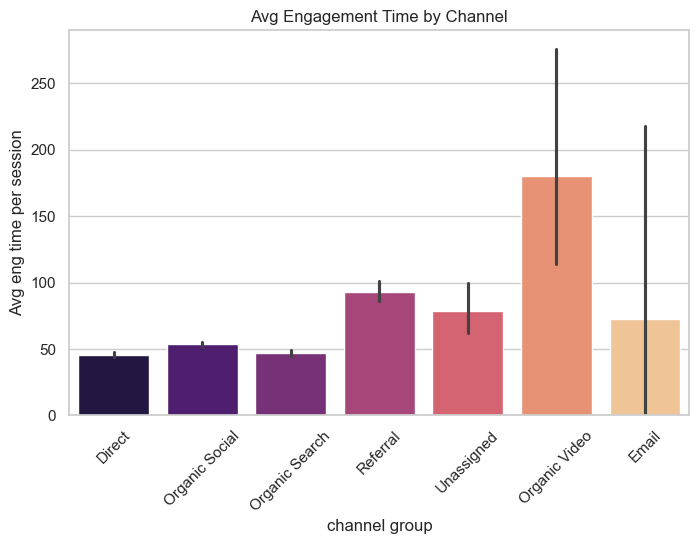

In [162]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x="channel group", y="Avg eng time per session",estimator=np.mean,palette="magma")
plt.title("Avg Engagement Time by Channel")
plt.xticks(rotation=45)
plt.show()

In [172]:
df.head()

channel group            DateHour  Users  Sessions  Engaged Session  \
0          Direct 2024-04-16 23:00:00    237       300              144   
1  Organic Social 2024-04-17 19:00:00    208       267              132   
2          Direct 2024-04-17 23:00:00    188       233              115   
3  Organic Social 2024-04-17 18:00:00    187       256              125   
4  Organic Social 2024-04-17 20:00:00    175       221              112   

   Avg eng time per session  Engaged sessions per user  Events per session  \
0                 47.526667                   0.607595            4.673333   
1                 32.097378                   0.634615            4.295880   
2                 39.939914                   0.611702            4.587983   
3                 32.160156                   0.668449            4.078125   
4                 46.918552                   0.640000            4.529412   

   Engagement per rate  Event count  Hour  
0             0.480000         1402    23  
1             0.494382         1147    19  
2             0.493562         1069    23  
3             0.488281         1044    18  
4             0.506787         1001    20

In [178]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="channel group", y="Engagement per rate", palette="coolwarm")
plt.title("📦 Engagement Rate Distribution by Channel")
plt.xticks(rotation=45)
plt.show()

/var/folders/l7/t8x25d5d2gl5byc3kl97khjr0000gn/T/ipykernel_84398/1528285846.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="channel group", y="Engagement per rate", palette="coolwarm")
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


In [180]:
df.head()

channel group            DateHour  Users  Sessions  Engaged Session  \
0          Direct 2024-04-16 23:00:00    237       300              144   
1  Organic Social 2024-04-17 19:00:00    208       267              132   
2          Direct 2024-04-17 23:00:00    188       233              115   
3  Organic Social 2024-04-17 18:00:00    187       256              125   
4  Organic Social 2024-04-17 20:00:00    175       221              112   

   Avg eng time per session  Engaged sessions per user  Events per session  \
0                 47.526667                   0.607595            4.673333   
1                 32.097378                   0.634615            4.295880   
2                 39.939914                   0.611702            4.587983   
3                 32.160156                   0.668449            4.078125   
4                 46.918552                   0.640000            4.529412   

   Engagement per rate  Event count  Hour  
0             0.480000         1402    23  
1             0.494382         1147    19  
2             0.493562         1069    23  
3             0.488281         1044    18  
4             0.506787         1001    20

/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 129485 (\N{STANDING PERSON}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


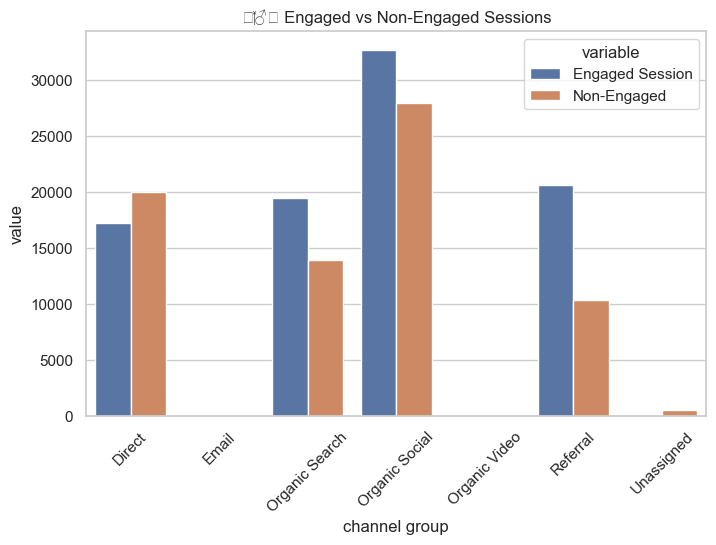

In [204]:
session_df = df.groupby("channel group")[["Sessions", "Engaged Session"]].sum().reset_index()
session_df["Non-Engaged"] = session_df["Sessions"] - session_df["Engaged Session"]
session_df_melted = session_df.melt(id_vars="channel group", value_vars=["Engaged Session","Non-Engaged"])



plt.figure(figsize=(8, 5))
sns.barplot(data=session_df_melted, x="channel group", y="value", hue="variable")
plt.title("🧍‍♂️ Engaged vs Non-Engaged Sessions")
plt.xticks(rotation=45)
plt.show()


In [206]:
heatmap_data = df.groupby(["Hour", "channel group"])["Sessions"].sum().unstack()

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="YlGnBu", linewidths=.5, annot=True, fmt='.0f')
plt.title("⏰ Traffic by Hour and Channel")
plt.xlabel("Channel Group")
plt.ylabel("Hour of Day")
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


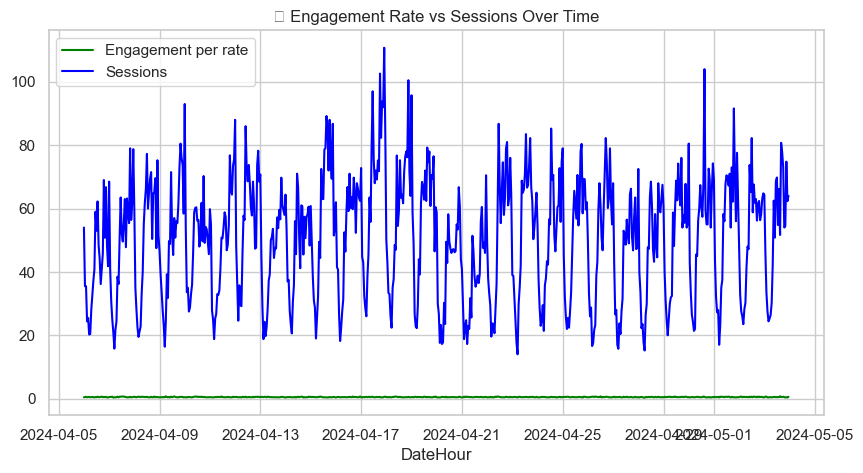

In [214]:
df_plot = df.groupby("DateHour")[["Engagement per rate", "Sessions"]].mean().reset_index()
plt.figure(figsize=(10, 5))
plt.plot(df_plot["DateHour"], df_plot["Engagement per rate"], label="Engagement per rate",color="green")
plt.plot(df_plot["DateHour"], df_plot["Sessions"], label="Sessions", color="blue")
plt.title("📊 Engagement Rate vs Sessions Over Time")
plt.xlabel("DateHour")
plt.legend()
plt.grid(True)
plt.show()